# SIGNATE Jリーグ動員観客予想コンペ
wetherは当日の天気が未来だしとりあえず考慮しないで動かしてみる。
スタジアムのキャパが動員数に反映されるのでスタジアムと動員数をパーセンテージで考えるのが良い？


In [0]:
# 正規表現の奴
import re

# 諸々
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [14]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
match_df = ('data/match_reports.csv')
holiday_df = pd.read_csv('data/holidays_in_japan.csv')
studium_df = pd.read_csv('data/stadium_capacity_mapping.csv')
smpsb_df = pd.read_csv('data/sample_submit.csv', header=None)
train_df.venue.nunique()

60

In [15]:
train_df['weather'].value_counts().head()
# fuckなの

晴       1680
曇        889
雨        252
屋内        83
曇のち雨      76
Name: weather, dtype: int64

## 前処理

In [16]:
# まとめて前処理を行いたいのでtrainとdfをひとまとめにする。
target = train_df.attendance
total_df = pd.concat([train_df.drop("attendance", axis=1), test_df])
total_df

,id,match_date,kick_off_time,section,round,home_team,away_team,venue,weather,temperature,humidity,broadcasters
0,9190,2006-03-04,16:04,第1節,第1日,G大阪,浦和,万博記念競技場,晴,8.3,40.0,NHK総合/J SPORTS(録)
1,9191,2006-03-05,13:00,第1節,第2日,甲府,清水,山梨県小瀬スポーツ公園陸上競技場,晴,12.9,28.0,山梨放送/テレビ静岡(録)/J SPORTS(録)
2,9192,2006-03-05,13:35,第1節,第2日,FC東京,大分,味の素スタジアム,晴,12.1,35.0,BS-i/MXテレビ(録)/J SPORTS(録)
3,9193,2006-03-05,14:04,第1節,第2日,磐田,福岡,静岡スタジアムエコパ,晴,11.6,42.0,J SPORTS
4,9194,2006-03-05,14:04,第1節,第2日,名古屋,C大阪,名古屋市瑞穂陸上競技場,晴,13.1,32.0,スカイパーフェクTV!/NHK名古屋(録)/NHK大阪(録)/J SPORTS(録)
5,9195,2006-03-05,15:03,第1節,第2日,大宮,千葉,埼玉スタジアム2002,晴,12.6,33.0,テレビ埼玉/BS(録)/J SPORTS(録)
6,9196,2006-03-05,15:00,第1節,第2日,川崎F,新潟,等々力陸上競技場,晴,13.3,34.0,J SPORTS(録)
7,9197,2006-03-05,15:06,第1節,第2日,広島,鹿島,広島ビッグアーチ,曇,12.4,58.0,BS/J SPORTS(録)
8,9198,2006-03-05,15:35,第1節,第2日,横浜FM,京都,日産スタジアム,晴,12.6,34.0,BS-i/KBS京都(録)/J SPORTS(録)
9,9199,2006-03-11,14:04,第2節,第1日,浦和,磐田,埼玉スタジアム2002,晴,16.0,48.0,TBS(単)/静岡放送/テレビ埼玉(録)/J SPORTS(録)


### 日付の変更

In [17]:

# datetime型に変換
total_df.loc[:, "match_date"] = pd.to_datetime(total_df["match_date"])
total_df.loc[:, "kick_off_time"] = pd.to_datetime(total_df["kick_off_time"])
holiday_df["holiday_date"] = pd.to_datetime(holiday_df["holiday_date"])

total_df["match_date_year"] = total_df["match_date"].dt.year
total_df["match_date_month"] = total_df["match_date"].dt.month
total_df["match_date_day"] = total_df["match_date"].dt.day
total_df["match_date_dayofweek"] = total_df["match_date"].dt.dayofweek  # Monday=0, Sunday=6

# 祝日の判定
holiday_df["match_date_is_holiday"] = 1
total_df = total_df.merge(right=holiday_df[["holiday_date", "match_date_is_holiday"]],
                          how="left",
                          left_on="match_date",
                          right_on="holiday_date").drop("holiday_date", axis=1)
total_df["match_date_is_holiday"].fillna(0, inplace=True)

total_df["kick_off_time_hour"] = total_df["kick_off_time"].dt.hour
total_df

,id,match_date,kick_off_time,section,round,home_team,away_team,venue,weather,temperature,humidity,broadcasters,match_date_year,match_date_month,match_date_day,match_date_dayofweek,match_date_is_holiday,kick_off_time_hour
0,9190,2006-03-04,2018-10-08 16:04:00,第1節,第1日,G大阪,浦和,万博記念競技場,晴,8.3,40.0,NHK総合/J SPORTS(録),2006,3,4,5,0.0,16
1,9191,2006-03-05,2018-10-08 13:00:00,第1節,第2日,甲府,清水,山梨県小瀬スポーツ公園陸上競技場,晴,12.9,28.0,山梨放送/テレビ静岡(録)/J SPORTS(録),2006,3,5,6,0.0,13
2,9192,2006-03-05,2018-10-08 13:35:00,第1節,第2日,FC東京,大分,味の素スタジアム,晴,12.1,35.0,BS-i/MXテレビ(録)/J SPORTS(録),2006,3,5,6,0.0,13
3,9193,2006-03-05,2018-10-08 14:04:00,第1節,第2日,磐田,福岡,静岡スタジアムエコパ,晴,11.6,42.0,J SPORTS,2006,3,5,6,0.0,14
4,9194,2006-03-05,2018-10-08 14:04:00,第1節,第2日,名古屋,C大阪,名古屋市瑞穂陸上競技場,晴,13.1,32.0,スカイパーフェクTV!/NHK名古屋(録)/NHK大阪(録)/J SPORTS(録),2006,3,5,6,0.0,14
5,9195,2006-03-05,2018-10-08 15:03:00,第1節,第2日,大宮,千葉,埼玉スタジアム2002,晴,12.6,33.0,テレビ埼玉/BS(録)/J SPORTS(録),2006,3,5,6,0.0,15
6,9196,2006-03-05,2018-10-08 15:00:00,第1節,第2日,川崎F,新潟,等々力陸上競技場,晴,13.3,34.0,J SPORTS(録),2006,3,5,6,0.0,15
7,9197,2006-03-05,2018-10-08 15:06:00,第1節,第2日,広島,鹿島,広島ビッグアーチ,曇,12.4,58.0,BS/J SPORTS(録),2006,3,5,6,0.0,15
8,9198,2006-03-05,2018-10-08 15:35:00,第1節,第2日,横浜FM,京都,日産スタジアム,晴,12.6,34.0,BS-i/KBS京都(録)/J SPORTS(録),2006,3,5,6,0.0,15
9,9199,2006-03-11,2018-10-08 14:04:00,第2節,第1日,浦和,磐田,埼玉スタジアム2002,晴,16.0,48.0,TBS(単)/静岡放送/テレビ埼玉(録)/J SPORTS(録),2006,3,11,5,0.0,14


In [18]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3843 entries, 0 to 3842
Data columns (total 18 columns):
id                       3843 non-null int64
match_date               3843 non-null datetime64[ns]
kick_off_time            3843 non-null datetime64[ns]
section                  3843 non-null object
round                    3843 non-null object
home_team                3843 non-null object
away_team                3843 non-null object
venue                    3843 non-null object
weather                  3825 non-null object
temperature              3825 non-null float64
humidity                 3825 non-null float64
broadcasters             3843 non-null object
match_date_year          3843 non-null int64
match_date_month         3843 non-null int64
match_date_day           3843 non-null int64
match_date_dayofweek     3843 non-null int64
match_date_is_holiday    3843 non-null float64
kick_off_time_hour       3843 non-null int64
dtypes: datetime64[ns](2), float64(3), int64(6), obj

## 文字列の処理


### 文字→数字

In [0]:
total_df.loc[:, "section"] = total_df.loc[:, "section"].apply(lambda x: int(x[1:-1]))
total_df.loc[:, "round"] = total_df.loc[:, "round"].apply(lambda x: int(x[1:-1]))

### チーム名(半角と全角が混ざってる

In [20]:
teams = set(total_df["home_team"].unique().tolist() + total_df["away_team"].unique().tolist())
teams

{'C大阪',
 'FC東京',
 'G大阪',
 '京都',
 '仙台',
 '千葉',
 '名古屋',
 '大分',
 '大宮',
 '山形',
 '川崎F',
 '川崎Ｆ',
 '広島',
 '徳島',
 '新潟',
 '札幌',
 '東京V',
 '松本',
 '柏',
 '横浜FC',
 '横浜FM',
 '浦和',
 '清水',
 '湘南',
 '甲府',
 '磐田',
 '神戸',
 '福岡',
 '長崎',
 '鳥栖',
 '鹿島',
 'Ｃ大阪',
 'Ｇ大阪'}

In [0]:
def change(iterable):
    zen = list("ＡＢＣＤＥＦＧＨＩＪＫＬＭＮＯＰＱＲＳＴＵＶＷＸＹＺ" +
               "ａｂｃｄｅｆｇｈｉｊｋｌｍｎｏｐｑｒｓｔｕｖｗｘｙｚ" +
               "０１２３４５６７８９，、．。（）＿−　")
    han = list("ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789,,..()_- ")
    z2h = {}
    pattern = "|".join(zen)
    for it in iterable:
        if re.search(pattern, it) is None:
            continue
        target = it*1
        for z, h in zip(zen, han):
            target = target.replace(z, h)
        z2h[it] = target
    return z2h

z2h = change(teams)
total_df["home_team"].replace(z2h, inplace=True)
total_df["away_team"].replace(z2h, inplace=True)

In [22]:
teams = set(total_df["home_team"].unique().tolist() + total_df["away_team"].unique().tolist())
teams

{'C大阪',
 'FC東京',
 'G大阪',
 '京都',
 '仙台',
 '千葉',
 '名古屋',
 '大分',
 '大宮',
 '山形',
 '川崎F',
 '広島',
 '徳島',
 '新潟',
 '札幌',
 '東京V',
 '松本',
 '柏',
 '横浜FC',
 '横浜FM',
 '浦和',
 '清水',
 '湘南',
 '甲府',
 '磐田',
 '神戸',
 '福岡',
 '長崎',
 '鳥栖',
 '鹿島'}

In [0]:
for team in teams:
    total_df["team_" + team] = (total_df["home_team"] == team) | (total_df["away_team"] == team)

In [24]:
total_df

,id,match_date,kick_off_time,section,round,home_team,away_team,venue,weather,temperature,...,team_清水,team_山形,team_長崎,team_札幌,team_浦和,team_福岡,team_横浜FM,team_湘南,team_柏,team_千葉
0,9190,2006-03-04,2018-10-08 16:04:00,1,1,G大阪,浦和,万博記念競技場,晴,8.3,...,False,False,False,False,True,False,False,False,False,False
1,9191,2006-03-05,2018-10-08 13:00:00,1,2,甲府,清水,山梨県小瀬スポーツ公園陸上競技場,晴,12.9,...,True,False,False,False,False,False,False,False,False,False
2,9192,2006-03-05,2018-10-08 13:35:00,1,2,FC東京,大分,味の素スタジアム,晴,12.1,...,False,False,False,False,False,False,False,False,False,False
3,9193,2006-03-05,2018-10-08 14:04:00,1,2,磐田,福岡,静岡スタジアムエコパ,晴,11.6,...,False,False,False,False,False,True,False,False,False,False
4,9194,2006-03-05,2018-10-08 14:04:00,1,2,名古屋,C大阪,名古屋市瑞穂陸上競技場,晴,13.1,...,False,False,False,False,False,False,False,False,False,False
5,9195,2006-03-05,2018-10-08 15:03:00,1,2,大宮,千葉,埼玉スタジアム2002,晴,12.6,...,False,False,False,False,False,False,False,False,False,True
6,9196,2006-03-05,2018-10-08 15:00:00,1,2,川崎F,新潟,等々力陸上競技場,晴,13.3,...,False,False,False,False,False,False,False,False,False,False
7,9197,2006-03-05,2018-10-08 15:06:00,1,2,広島,鹿島,広島ビッグアーチ,曇,12.4,...,False,False,False,False,False,False,False,False,False,False
8,9198,2006-03-05,2018-10-08 15:35:00,1,2,横浜FM,京都,日産スタジアム,晴,12.6,...,False,False,False,False,False,False,True,False,False,False
9,9199,2006-03-11,2018-10-08 14:04:00,2,1,浦和,磐田,埼玉スタジアム2002,晴,16.0,...,False,False,False,False,True,False,False,False,False,False


### 会場のチェック

In [25]:
total_df["venue"].value_counts().sort_values().head(10)

コカ・コーラウエスト広島スタジアム    1
名古屋市瑞穂球技場            1
熊本県民総合運動公園陸上競技場      2
佐賀県総合運動場陸上競技場        3
鹿児島県立鴨池陸上競技場         3
柏の葉公園総合競技場           3
石川県西部緑地公園陸上競技場       4
宮城スタジアム              4
大阪長居第2陸上競技場          5
静岡スタジアムエコパ           7
Name: venue, dtype: int64

In [0]:
total_df = total_df.merge(right=studium_df,
                         how="left",
                         left_on="venue",
                         right_on="stadium").drop("stadium", axis=1)

In [27]:
total_df["weather"].value_counts().head(20)

晴          1907
曇           992
雨           291
屋内          105
曇のち雨         89
晴のち曇         83
雨のち曇         76
曇のち晴         57
曇時々雨         44
曇時々晴         39
晴時々曇         34
曇一時雨         28
晴のち雨         10
雨時々曇          9
晴一時曇          7
曇一時晴          6
晴一時雨          6
雨一時曇          4
雨のち曇一時雨       2
晴一時雨のち曇       2
Name: weather, dtype: int64

In [28]:
for condition in ["晴", "曇", "雨", "屋内", "雷", "雪", "霧", "のち", "時々", "一時"]:
    total_df["weather_{}".format(condition)] = total_df["weather"].str.contains(condition)
total_df

,id,match_date,kick_off_time,section,round,home_team,away_team,venue,weather,temperature,...,weather_晴,weather_曇,weather_雨,weather_屋内,weather_雷,weather_雪,weather_霧,weather_のち,weather_時々,weather_一時
0,9190,2006-03-04,2018-10-08 16:04:00,1,1,G大阪,浦和,万博記念競技場,晴,8.3,...,True,False,False,False,False,False,False,False,False,False
1,9191,2006-03-05,2018-10-08 13:00:00,1,2,甲府,清水,山梨県小瀬スポーツ公園陸上競技場,晴,12.9,...,True,False,False,False,False,False,False,False,False,False
2,9192,2006-03-05,2018-10-08 13:35:00,1,2,FC東京,大分,味の素スタジアム,晴,12.1,...,True,False,False,False,False,False,False,False,False,False
3,9193,2006-03-05,2018-10-08 14:04:00,1,2,磐田,福岡,静岡スタジアムエコパ,晴,11.6,...,True,False,False,False,False,False,False,False,False,False
4,9194,2006-03-05,2018-10-08 14:04:00,1,2,名古屋,C大阪,名古屋市瑞穂陸上競技場,晴,13.1,...,True,False,False,False,False,False,False,False,False,False
5,9195,2006-03-05,2018-10-08 15:03:00,1,2,大宮,千葉,埼玉スタジアム2002,晴,12.6,...,True,False,False,False,False,False,False,False,False,False
6,9196,2006-03-05,2018-10-08 15:00:00,1,2,川崎F,新潟,等々力陸上競技場,晴,13.3,...,True,False,False,False,False,False,False,False,False,False
7,9197,2006-03-05,2018-10-08 15:06:00,1,2,広島,鹿島,広島ビッグアーチ,曇,12.4,...,False,True,False,False,False,False,False,False,False,False
8,9198,2006-03-05,2018-10-08 15:35:00,1,2,横浜FM,京都,日産スタジアム,晴,12.6,...,True,False,False,False,False,False,False,False,False,False
9,9199,2006-03-11,2018-10-08 14:04:00,2,1,浦和,磐田,埼玉スタジアム2002,晴,16.0,...,True,False,False,False,False,False,False,False,False,False


In [0]:
dirty_casters = set()
for casters in total_df["broadcasters"].str.split("/"):
    dirty_casters.update(casters)

In [30]:
dirty_casters

{'BS',
 'BS(録)',
 'BS-TBS',
 'BS-TBS(録)',
 'BS-i',
 'BS-i(録)',
 'BS※',
 'BSーTBS',
 'BSーTBS(録)',
 'BSーi',
 'DAZN',
 'DAZN ※AFCチャンピオンズリーグ2017の影響により、G大阪vs鹿島は7月5日(水)に開催',
 'DAZN ※AFCチャンピオンズリーグ2017の影響により、川崎Fvs浦和は7月5日(水)に開催',
 'J SPORTS',
 'J SPORTS ESPN',
 'J SPORTS(録)',
 'J SPORTS2',
 'KBS京都',
 'KBS京都(録)',
 'MXテレビ',
 'MXテレビ(録)',
 'MXテレビ*',
 'NHK BS1',
 'NHK BS1 ※4 AFCチャンピオンズリーグ2016の影響により、浦和vsFC東京は6月22日(水)に開催',
 'NHK BS1 ※6 浦和がスルガ銀行チャンピオンシップ2017SAITAMAに出場のため、7月22日(土)に開催',
 'NHK BS1 ※AFCチャンピオンズリーグ2018の影響により、C大阪vs鹿島は7月25日(水)に開催',
 'NHK BS1(101ch)',
 'NHK BS1(102ch)',
 'NHK BS1(録)',
 'NHK-BSハイビジョン',
 'NHK京都',
 'NHK仙台',
 'NHK仙台 ※ AFCチャンピオンズリーグ2015準決勝の影響により、10月25日(日)に開催。',
 'NHK仙台(東北ブロック)',
 'NHK佐賀',
 'NHK名古屋',
 'NHK名古屋(録)',
 'NHK大分',
 'NHK大阪',
 'NHK大阪(近畿ブロック)',
 'NHK大阪(録)',
 'NHK山形',
 'NHK岐阜',
 'NHK岩手',
 'NHK広島',
 'NHK徳島',
 'NHK新潟',
 'NHK新潟*',
 'NHK札幌',
 'NHK水戸',
 'NHK水戸*',
 'NHK津',
 'NHK甲府',
 'NHK神戸',
 'NHK神戸(近畿ブロック)',
 'NHK神戸(録)',
 'NHK福岡',
 'NHK福島',
 'NHK秋田',
 'NHK総合',
 'NHK総合(録)',
 'NHK長崎',

In [0]:
clean_casters = set()

def cleanify(caster):
    caster = caster.upper()
    caster = re.sub("\(.+\)|\*", "", caster)
    caster = caster.split("※")[0]\
                    .rstrip(" ")\
                    .replace("ー", "-")\
                    .replace(" ", "_")
    if caster[:4] == "スカパ-":
        caster = "スカパー"
    return caster

for caster in dirty_casters:
    clean_casters.add(cleanify(caster))

In [32]:
clean_casters

{'BS',
 'BS-I',
 'BS-TBS',
 'DAZN',
 'E2',
 'E2スカチャン',
 'E2スカチャンHD',
 'J_SPORTS',
 'J_SPORTS2',
 'J_SPORTS_ESPN',
 'KBS京都',
 'MXテレビ',
 'NHK-BSハイビジョン',
 'NHK_BS1',
 'NHK京都',
 'NHK仙台',
 'NHK佐賀',
 'NHK名古屋',
 'NHK大分',
 'NHK大阪',
 'NHK山形',
 'NHK岐阜',
 'NHK岩手',
 'NHK広島',
 'NHK徳島',
 'NHK新潟',
 'NHK札幌',
 'NHK水戸',
 'NHK津',
 'NHK甲府',
 'NHK神戸',
 'NHK福岡',
 'NHK福島',
 'NHK秋田',
 'NHK総合',
 'NHK長崎',
 'NHK長野',
 'NHK青森',
 'NHK静岡',
 'RKB毎日放送',
 'TBS',
 'TOKYO_MX',
 'TOKYO_MX2',
 'TVK',
 'TVQ九州放送',
 'ひかりTV',
 'サンテレビ',
 'スカイパ-フェクTV!',
 'スカパー',
 'テレビ信州',
 'テレビ北海道',
 'テレビ埼玉',
 'テレビ大分',
 'テレビ大阪',
 'テレビ山梨',
 'テレビ新潟',
 'テレビ神奈川',
 'テレビ西日本',
 'テレビ静岡',
 'テレ玉',
 'ミヤギテレビ',
 '中京テレビ',
 '中国放送',
 '中部日本放送',
 '九州朝日放送',
 '仙台放送',
 '信越放送',
 '北海道テレビ',
 '北海道テレビ放送',
 '北海道放送',
 '北海道文化放送',
 '千葉テレビ',
 '名古屋テレビ',
 '大分朝日放送',
 '山梨放送',
 '新潟テレビ21',
 '新潟放送',
 '新潟総合テレビ',
 '日本テレビ',
 '朝日放送',
 '札幌テレビ',
 '札幌テレビ放送',
 '東北放送',
 '東日本放送',
 '東海テレビ',
 '毎日放送',
 '福岡放送',
 '長崎国際テレビ',
 '長野放送',
 '長野朝日放送',
 '関西テレビ',
 '静岡放送',
 '静岡朝日テレビ',
 '静岡第一テレビ'}

In [0]:
tmp = total_df["broadcasters"].str.split("/")\
                            .apply(lambda casters: [cleanify(caster) for caster in casters])
total_df["broadcasters"] = tmp


In [0]:
for caster in clean_casters:
    total_df["broadcasters_{}".format(caster)] = total_df["broadcasters"].apply(lambda casters: caster in casters)



Text(0.5,1,'kick off time')

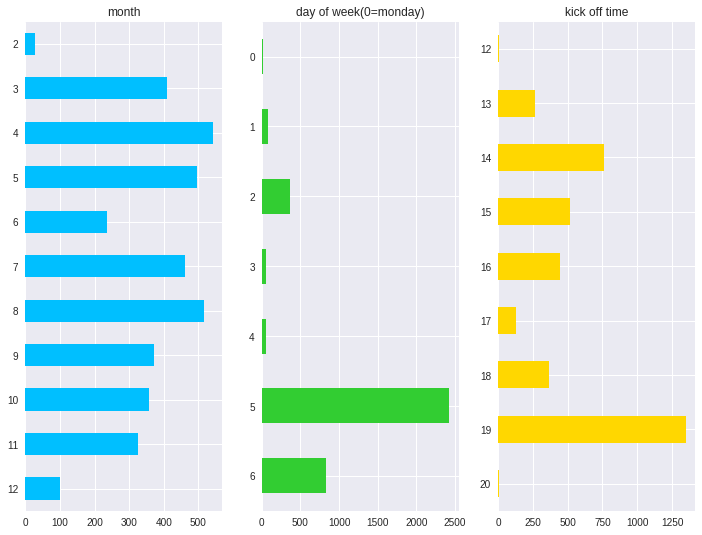

In [35]:
fig, axs = plt.subplots(1, 3, figsize=(12, 9))
axs = axs.flatten()
total_df["match_date_month"].value_counts()\
                            .sort_index(ascending=False)\
                            .plot(kind="barh", ax=axs[0], color="deepskyblue")
axs[0].set_title("month")

total_df["match_date_dayofweek"].value_counts()\
                                .sort_index(ascending=False)\
                                .plot(kind="barh", ax=axs[1], color="limegreen")
axs[1].set_title("day of week(0=monday)")

total_df["kick_off_time_hour"].value_counts()\
                            .sort_index(ascending=False)\
                            .plot(kind="barh", ax=axs[2], color="gold")
axs[2].set_title("kick off time")

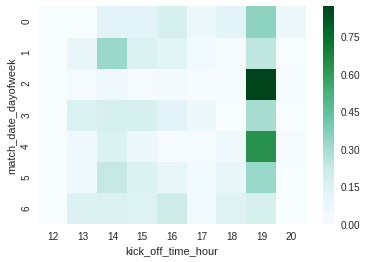

In [36]:
# 曜日ごとにどの時間に始まりやすいかを観察
# dayofweek 0 = monday.
# 平日はナイターが多く、土日は分散しているように見える。
# 火曜日木曜日のナイターが多い？
pivot = total_df.pivot_table(index="match_date_dayofweek",
                             columns="kick_off_time_hour",
                             values="id",
                             aggfunc="count").fillna(0)
pivot = pivot / (pivot.sum(axis=1).values.reshape(-1, 1) * np.ones((1, 9)))
sns.heatmap(pivot, cmap="BuGn")

(0, 1)

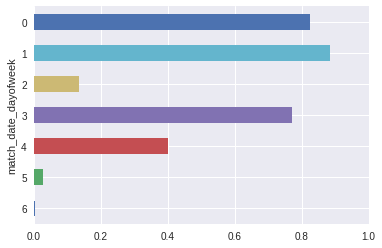

In [37]:
# 曜日のうち休日の割合　0 = monday
# 水曜日は休日が少なく、ナイターの割合が多い
total_df.groupby("match_date_dayofweek")["match_date_is_holiday"]\
        .mean()\
        .sort_index(ascending=False)\
        .plot(kind="barh")

plt.xlim(0, 1)

In [38]:
total_df = total_df.dropna()
train_df = total_df.query("id < 19075")

train_df = pd.concat([train_df, target], axis=1)
train_df

,id,match_date,kick_off_time,section,round,home_team,away_team,venue,weather,temperature,...,broadcasters_北海道放送,broadcasters_東日本放送,broadcasters_テレビ西日本,broadcasters_NHK広島,broadcasters_関西テレビ,broadcasters_札幌テレビ,broadcasters_TVK,broadcasters_テレビ神奈川,broadcasters_北海道テレビ,attendance
0,9190,2006-03-04,2018-10-08 16:04:00,1,1,G大阪,浦和,万博記念競技場,晴,8.3,...,False,False,False,False,False,False,False,False,False,20916
1,9191,2006-03-05,2018-10-08 13:00:00,1,2,甲府,清水,山梨県小瀬スポーツ公園陸上競技場,晴,12.9,...,False,False,False,False,False,False,False,False,False,14277
2,9192,2006-03-05,2018-10-08 13:35:00,1,2,FC東京,大分,味の素スタジアム,晴,12.1,...,False,False,False,False,False,False,False,False,False,22531
3,9193,2006-03-05,2018-10-08 14:04:00,1,2,磐田,福岡,静岡スタジアムエコパ,晴,11.6,...,False,False,False,False,False,False,False,False,False,28564
4,9194,2006-03-05,2018-10-08 14:04:00,1,2,名古屋,C大阪,名古屋市瑞穂陸上競技場,晴,13.1,...,False,False,False,False,False,False,False,False,False,17199
5,9195,2006-03-05,2018-10-08 15:03:00,1,2,大宮,千葉,埼玉スタジアム2002,晴,12.6,...,False,False,False,False,False,False,False,False,False,13085
6,9196,2006-03-05,2018-10-08 15:00:00,1,2,川崎F,新潟,等々力陸上競技場,晴,13.3,...,False,False,False,False,False,False,False,False,False,17444
7,9197,2006-03-05,2018-10-08 15:06:00,1,2,広島,鹿島,広島ビッグアーチ,曇,12.4,...,False,False,False,False,False,False,False,False,False,17564
8,9198,2006-03-05,2018-10-08 15:35:00,1,2,横浜FM,京都,日産スタジアム,晴,12.6,...,False,False,False,False,False,False,False,False,False,23607
9,9199,2006-03-11,2018-10-08 14:04:00,2,1,浦和,磐田,埼玉スタジアム2002,晴,16.0,...,False,False,False,False,False,False,False,False,False,56512


In [0]:
# sns.pairplot(train_df.select_dtypes([np.int64, np.float64]))

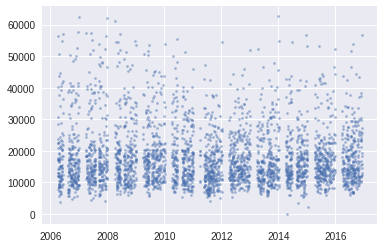

In [40]:
# 時系列を見る
# 年代での観客数の変化はすくなさそう
x = train_df["match_date_year"] + train_df["match_date_month"] / 12 + train_df["match_date_day"] /365

y = train_df["attendance"]
plt.scatter(x, y, alpha=0.5, s=5)

# モデリング

## データの準備

In [41]:
# 今回は欠損値に関して考えないものとする
total_df = total_df.dropna()
bool_col = train_df.filter(regex="^weather_").columns.tolist()
bool_col

['weather_晴',
 'weather_曇',
 'weather_雨',
 'weather_屋内',
 'weather_雷',
 'weather_雪',
 'weather_霧',
 'weather_のち',
 'weather_時々',
 'weather_一時']

In [0]:
total_df.loc[:, bool_col] = total_df.loc[:, bool_col].astype(np.bool8)

In [0]:
# objectとdatetimeは直接使えないので今回は取り除く
del_col = total_df.select_dtypes(["object", np.datetime64]).columns
total_df.drop(del_col, axis=1, inplace=True)

In [0]:
# 全体の１%に含まれないbool型は削除する
threshold = 0.01
bool_df = total_df.select_dtypes("bool")
del_col = (bool_df.sum(axis=0)[bool_df.sum(axis=0) <= train_df.shape[0] * threshold]).index.tolist()
total_df.drop(del_col, axis=1, inplace=True)

In [45]:
train_df.query("attendance <= 4000")[["match_date", "home_team", "away_team", "venue", "attendance", "capacity"]]

,match_date,home_team,away_team,venue,attendance,capacity
48,2006-04-02,京都,福岡,京都市西京極総合運動公園陸上競技場兼球技場,3670,20588
2479,2014-03-23,浦和,清水,埼玉スタジアム2002,0,62010
2608,2014-08-02,徳島,甲府,鳴門・大塚スポーツパークポカリスエットスタジアム,3594,17924
2749,2014-12-08,新潟,柏,県立カシマサッカースタジアム,2104,37496


In [0]:
total_df = total_df.dropna()
train_df = total_df.query("id < 19075")
train_df = pd.concat([train_df, target], axis=1)
train_df.drop(2479, inplace=True) # 無観客試合
test_df = total_df.query("id >= 19075")

## hold-out法

In [0]:
# 2015年までのデータをtrainデータ,2016年のデータを訓練データとする。
# 評価関数はRMSLEなので予め目的変数のlogを取っておく

all_train_X = train_df.query("match_date_year <= 2015").drop(["id", "attendance"], axis=1)
all_train_y = np.log1p(train_df.query("match_date_year <= 2015")["attendance"])

train_X = train_df.query("match_date_year <= 2015").drop(["id", "attendance"], axis=1)
train_y = np.log1p(train_df.query("match_date_year <= 2015")["attendance"])

val_X = train_df.query("match_date_year == 2016").drop(["id", "attendance"], axis=1)
val_y = np.log1p(train_df.query("match_date_year == 2016")["attendance"])

text_X = test_df.drop(["id"], axis=1)

## randomforestによる予測

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.model_selection import GridSearchCV

parameters = {
        'n_estimators'      : [50, 100, 200, 300, 500, 1000],
        'max_features'      : [3, 5, 10, 15, 20],
        'random_state'      : [2357532],
        'n_jobs'            : [-1],　
        'min_samples_split' : [3, 5, 10, 15, 20, 25, 30, 40, 50, 100],
        'max_depth'         : [3, 5, 10, 15, 20, 25, 30, 40, 50, 100]
}
rfr = GridSearchCV(RandomForestRegressor(), parameters)

# rfr = RandomForestRegressor(n_estimators=900,
#                 n_jobs=-1,
#                 random_state=7532,
#                 )

rfr.fit(train_X, train_y)
train_pred = rfr.predict(train_X)
val_pred = rfr.predict(val_X)

print("train_score: {:<.5}".format(np.sqrt(mean_squared_error(train_y, train_pred))))
print("val_score: {:<.5}".format(np.sqrt(mean_squared_log_error(val_y, val_pred))))

    ### グリッドサーチ、ランダムサーチを試してみる

#### 上のcellの出力結果 gridsearchで100刻みで行ったやつとrandomsearchで0~1000でやったやつ
 - rfr_raw.n_eatimators : 10
 - rfr_grid.n_eatimators : 900
 - rfr_rand: 357
 - train_score: 0.085142
 - val_score: 0.023003
 - 
 - rfr_rawを使用した予測値 : 0.023975704805336156
 - rfr_gridを使用した予測値 : 0.023046144718301766
 - rfr_randを使用した予測値 : 0.023098152489329844


In [0]:
# 各モデルを使用した予想
print("rfr_rawを使用した予測値 : {}".format(np.sqrt(mean_squared_log_error(val_y, rfr_raw.predict(val_X)))))
print("rfr_gridを使用した予測値 : {}".format(np.sqrt(mean_squared_log_error(val_y, rfr_grid.predict(val_X)))))
print("rfr_randを使用した予測値 : {}".format(np.sqrt(mean_squared_log_error(val_y, rfr_rand.predict(val_X)))))

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score

# パラメータ指定
# グリッドサーチをするので、各パラメータ毎に数個指定する。
parameters = {}

# モデリング
rfr_grid = GridSearchCV(RandomForestRegressor(), parameters)

# フィッティング
rfr_grid.fit(train_X, train_y)

# 使用したパラメータを表示
print(rfr_grid.best_estimator_)

# 予想値
print("{:<.5}".format(np.sqrt(mean_squared_log_error)))

## 予想結果の解釈

In [0]:
plt.figure(figsize=(6, 15))
plt.barh(train_X.columns, rfr.feature_importances_)

In [0]:
# validationする
from sklearn.metrics import r2_score
plt.scatter(val_y, val_pred, alpha=0.7)
plt.title("$R^2 = {:<.5}$".format(r2_score(val_y, val_pred)))
x = np.linspace(8.5, 11, 100)
plt.plot(x, x, c="indianred")

## 結果の提出

In [0]:
# 改めて前訓練データで予測
rfr.fit(all_train_X, all_train_y)
test_pred = rfr.predict(text_X)
smpsb_df.iloc[:len(text_X), 1] = np.expm1(test_pred)

### rfr_gridで学習し、提出

In [0]:
rfr_grid.fit()